# MSBD 5002 Assignment 2 - Income Prediction

In [2]:
import os
import time
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Feature Engineering

In [3]:
data_folder = './data/'
training_features = 'trainFeatures.csv'
training_lables = 'trainLabels.csv'
testing_data = 'testFeatures.csv'

train_x = pd.read_csv(os.path.join(data_folder, training_features))
train_y = pd.read_csv(os.path.join(data_folder, training_lables), header = None, names=['over50k'])
test_x = pd.read_csv(os.path.join(data_folder, testing_data))


In [4]:
train_x.head(20)

,age,workclass,fnlwgt,education,education-num,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,24,Private,258298,Assoc-voc,11,Never-married,Tech-support,Not-in-family,White,Male,0,0,45,United-States
1,28,Private,208249,Some-college,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,24,United-States
2,49,Private,143459,9th,5,Separated,Handlers-cleaners,Own-child,White,Male,0,0,38,United-States
3,24,Private,228772,5th-6th,3,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico
4,20,State-gov,41103,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States
5,24,Private,89154,9th,5,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador
6,57,Private,157749,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
7,30,Private,202046,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,20,United-States
8,40,Private,163434,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
9,20,Private,180339,HS-grad,9,Never-married,Other-service,Other-relative,White,Female,0,0,35,United-States


In [5]:
test_x.head(20)

,age,workclass,fnlwgt,education,education-num,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,51,Private,150999,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
1,41,Private,433989,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,4386,0,60,United-States
2,41,Local-gov,183009,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States
3,59,Private,200316,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
4,53,Private,77462,Some-college,10,Separated,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States
5,52,Private,46788,Bachelors,13,Divorced,Craft-repair,Unmarried,White,Male,0,0,25,United-States
6,42,?,240027,HS-grad,9,Divorced,?,Not-in-family,Black,Female,0,0,40,United-States
7,47,Private,135246,11th,7,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States
8,37,Private,105044,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
9,25,Private,218136,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,0,40,Outlying-US(Guam-USVI-etc)


In [6]:
# data_labels.head(30)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(34189, 14)
(34189, 1)
(14653, 14)


### Handle missing value

In [7]:
train_x.drop(columns=['education'], inplace=True)
train_x.rename(columns={'education-num': 'education'}, inplace=True)
test_x.drop(columns=['education'], inplace=True)
test_x.rename(columns={'education-num': 'education'}, inplace=True)
print('')

In [8]:
train_x.head(20)

,age,workclass,fnlwgt,education,Marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,24,Private,258298,11,Never-married,Tech-support,Not-in-family,White,Male,0,0,45,United-States
1,28,Private,208249,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,24,United-States
2,49,Private,143459,5,Separated,Handlers-cleaners,Own-child,White,Male,0,0,38,United-States
3,24,Private,228772,3,Never-married,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico
4,20,State-gov,41103,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States
5,24,Private,89154,5,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador
6,57,Private,157749,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
7,30,Private,202046,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,20,United-States
8,40,Private,163434,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
9,20,Private,180339,9,Never-married,Other-service,Other-relative,White,Female,0,0,35,United-States


In [9]:
nominal_columns = ['workclass', 'Marital-status', 'occupation', 'relationship', 'race', 'sex', 
       'native-country']

def missing_value_handler(column, replaced_value):
    for i in range(len(column)):
        if column[i] == ' ?' or column[i] == '?':
            column[i] = replaced_value

            
for cln in nominal_columns:
    missing_value_handler(train_x[cln], '') # empty string filling as mode

for cln in nominal_columns:
    missing_value_handler(test_x[cln], '') # empty string filling as mode


SyntaxError: invalid syntax (<ipython-input-10-7468e9a122cf>, line 1)

### Nominal value transform

In [11]:
# quantize_column = nominal_columns - ['workclass', '']

def quantize(column_name, dataset):
    column_maping = {label: idx for idx, label in enumerate(set(dataset[column_name]))}
    dataset[column_name] = dataset[column_name].map(column_maping)

for cln_name in nominal_columns:
    quantize(cln_name, train_x)
    quantize(cln_name, test_x)

In [12]:
# one hot encode

# from sklearn.preprocessing import OneHotEncoder

# def onehotize(column):
#     oh_encoder = OneHotEncoder()
#     oh_encoder.fit(column)
#     oh_result = oh_encoder.trasf
#     return oh_result

In [13]:
# oh_encoder.fit(train_x['sex'].reshape(1, -1))
# oh_encoder.transform(train_x['sex'])

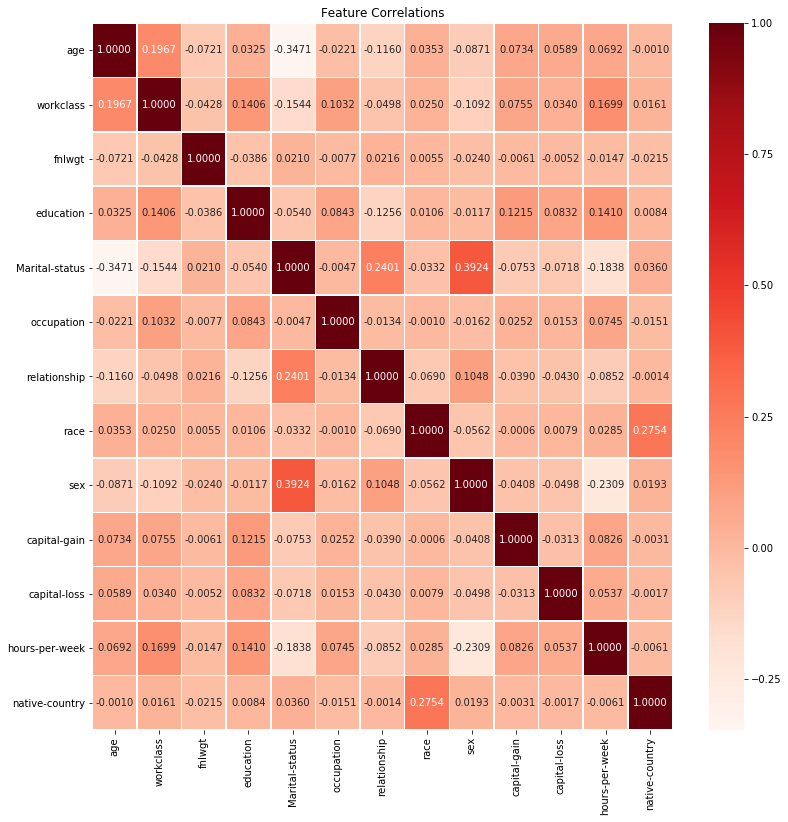

In [14]:
%matplotlib inline
feature_corr = train_x.corr()

fig = plt.figure(figsize=(13, 13))
sns.heatmap(feature_corr, annot=True, linewidths=.5, fmt= '.4f', cmap=plt.cm.Reds)
plt.title("Feature Correlations",fontsize=12)
fig.show()

In [15]:
# col = train_x['workclass']
# col[10] = ' 111'
# train_x['workclass'][10]
# range(len(col))
# train_x['workclass'].value_counts().index[0]
# train_x['workclass'].head(50)


### Model Training

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [17]:
x_train, x_validate, y_train, y_validate = train_test_split(train_x, train_y, test_size=0.3)

In [22]:
# Adaboost
adb_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=1000)

score = cross_val_score(adb_clf, train_x, train_y, cv=5)

In [23]:
np.mean(score)

0.8717716670912037

In [19]:
adb_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=1000)
adb_clf.fit(train_x, train_y)
result = adb_clf.predict(test_x)

In [28]:
result = pd.Series(result)
result

0        0
1        0
2        0
3        1
4        0
5        0
6        0
7        0
8        1
9        0
10       1
11       0
12       0
13       0
14       1
15       1
16       0
17       1
18       0
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
14623    1
14624    1
14625    0
14626    0
14627    0
14628    0
14629    1
14630    0
14631    0
14632    1
14633    1
14634    0
14635    0
14636    0
14637    0
14638    0
14639    0
14640    1
14641    0
14642    0
14643    1
14644    0
14645    0
14646    0
14647    0
14648    1
14649    0
14650    1
14651    0
14652    0
Length: 14653, dtype: int64

In [29]:
result.to_csv('./A2_itsc_stuid_prediction.csv', header=False, index=False)